<a href="https://colab.research.google.com/github/Safhanafarha775/Student-Performance-Analysis/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Student Performance Analysis using Pandas & Visualization

###Step 1 : Import libraries & dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset (you can later replace with CSV/Excel)
data = {
    'Name': ['Aisha','Rahul','Meera','Arjun','Sara','Kiran','Noor','Vivek'],
    'Gender': ['F','M','F','M','F','M','F','M'],
    'Maths': [78, 56, 89, 45, 90, 67, 88, 49],
    'Science': [82, 61, 92, 53, 87, 71, 90, 58],
    'English': [75, 64, 85, 50, 88, 69, 84, 55]
}

df = pd.DataFrame(data)
print(df)

    Name Gender  Maths  Science  English
0  Aisha      F     78       82       75
1  Rahul      M     56       61       64
2  Meera      F     89       92       85
3  Arjun      M     45       53       50
4   Sara      F     90       87       88
5  Kiran      M     67       71       69
6   Noor      F     88       90       84
7  Vivek      M     49       58       55


###Step 2 : Data Cleaning & Preparation

In [ ]:
# Handle missing values (if any)
df = df.fillna(0)

# Add total & average marks
df['Total'] = df[['Maths','Science','English']].sum(axis=1)
df['Average'] = df[['Maths','Science','English']].mean(axis=1)

# Add Grade
def grade(avg):
    if avg >= 85:
        return 'A'
    elif avg >= 70:
        return 'B'
    elif avg >= 50:
        return 'C'
    else:
        return 'D'

df['Grade'] = df['Average'].apply(grade)

print(df)

    Name Gender  Maths  Science  English  Total    Average Grade
0  Aisha      F     78       82       75    235  78.333333     B
1  Rahul      M     56       61       64    181  60.333333     C
2  Meera      F     89       92       85    266  88.666667     A
3  Arjun      M     45       53       50    148  49.333333     D
4   Sara      F     90       87       88    265  88.333333     A
5  Kiran      M     67       71       69    207  69.000000     C
6   Noor      F     88       90       84    262  87.333333     A
7  Vivek      M     49       58       55    162  54.000000     C


###Step 3 : Analysis with Pandas

In [ ]:
# Subject-wise average
print("Average Marks per Subject:\n", df[['Maths','Science','English']].mean())

# Group by gender
print("Average by Gender:\n", df.groupby('Gender')[['Maths','Science','English','Total']].mean())

Average Marks per Subject:
 Maths      70.25
Science    74.25
English    71.25
dtype: float64
Average by Gender:
         Maths  Science  English  Total
Gender                                
F       86.25    87.75     83.0  257.0
M       54.25    60.75     59.5  174.5


###Step 4 : Visualization with Matplotlib & Seaborn

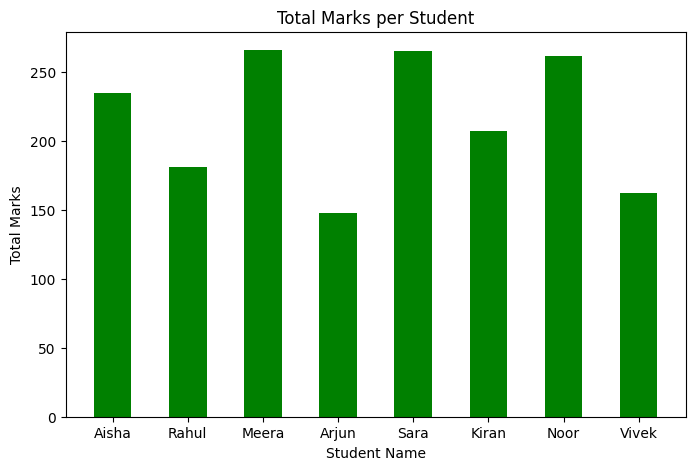

In [ ]:
# Bar chart: Total marks per student using matplotlib
plt.figure(figsize=(8,5))
plt.bar(x=df['Name'], height=df['Total'], width=0.5, color='green')
plt.title("Total Marks per Student")
plt.xlabel("Student Name")
plt.ylabel("Total Marks")
plt.show()

/tmp/ipython-input-266899737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Total', data=df, palette='viridis')


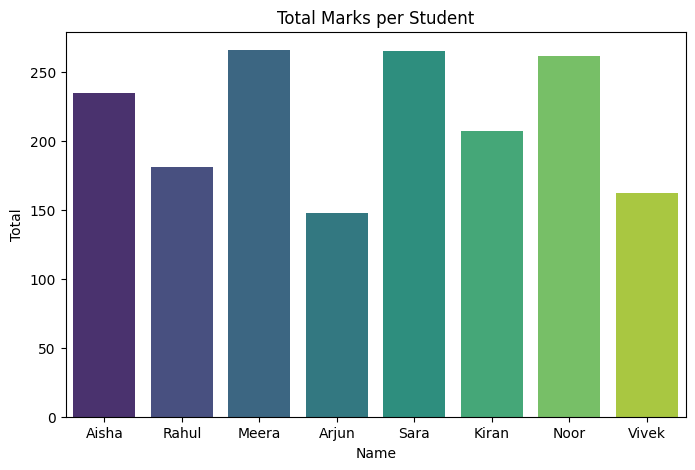

In [ ]:
# Bar chart: Total marks per student using seaborn
plt.figure(figsize=(8,5))
sns.barplot(x='Name', y='Total', data=df, palette='viridis')
plt.title("Total Marks per Student")
plt.show()

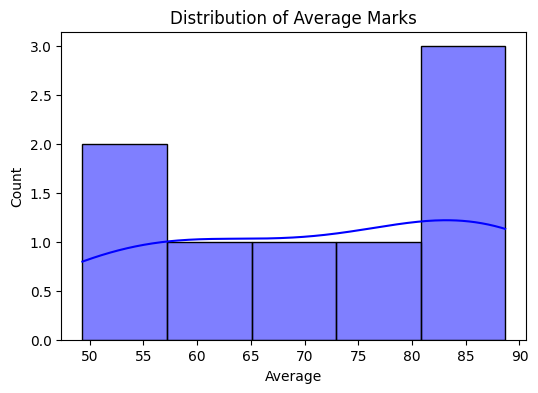

In [ ]:
# Histogram: Distribution of average marks
plt.figure(figsize=(6,4))
sns.histplot(df['Average'], bins=5, kde=True ,color='blue')
plt.title("Distribution of Average Marks")
plt.show()

/tmp/ipython-input-2435038104.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Total', data=df, palette='Set2')


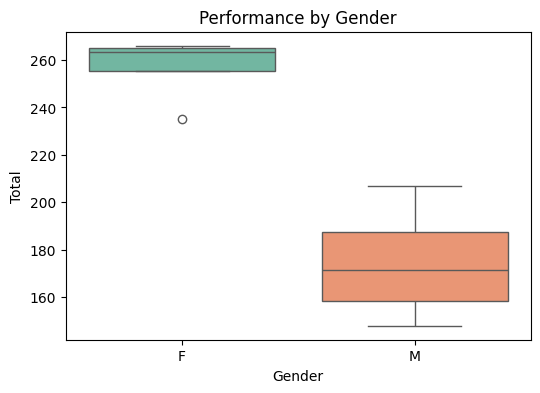

In [ ]:
# Boxplot: Gender comparison
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Total', data=df, palette='Set2')
plt.title("Performance by Gender")
plt.show()

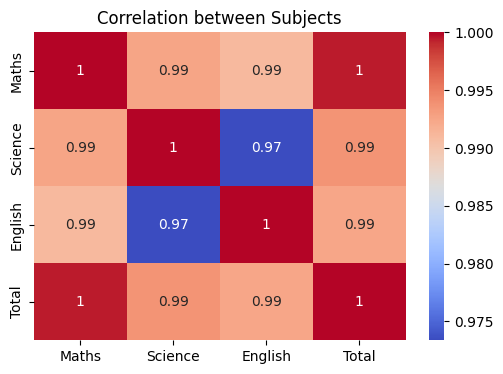

In [ ]:
# Heatmap: Correlation between subjects
plt.figure(figsize=(6,4))
sns.heatmap(df[['Maths','Science','English','Total']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Subjects")
plt.show()

###Step 5 : Export Clean Data

In [ ]:
df.to_csv("Student_Performance_Analysis.csv", index=False)